In [1]:
import requests
import time
import json
arr = []
end_cursor = '' # empty for the 1st page
tag = 'joesridge' # hastag goes here - set up to take a list of hashtags for future iterations
page_count = 5 # adjust var for desired num of pages
for i in range(0, page_count):
    url = "https://www.instagram.com/explore/tags/{0}/?__a=1&max_id={1}".format(tag, end_cursor)
    r = requests.get(url)
    data = json.loads(r.text)
    
    end_cursor = data['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor'] # value for the next page
    edges = data['graphql']['hashtag']['edge_hashtag_to_media']['edges'] # list with posts
    
    for item in edges:
       arr.append(item['node'])
    time.sleep(2) # time limit insurance
print(end_cursor) # save this to restart parsing with the next page
with open('insta_posts.json', 'w') as outfile:
    json.dump(arr, outfile) # save to json

QVFCQWgtUy1Rc3JGUFFaWmdhYjBqUEUybU81X1Z5X0JtRDRDMkdiUFpISGd2RS1SeW13UF92b3puemVwNTAwSG51SVNXSTZyZm5vbW12MHdONC00OHI1dg==


In [2]:
with open('insta_posts.json', 'r') as f:
    arr = json.loads(f.read()) # load json data from previous step
locations = []
for item in arr:
    shortcode = item['shortcode']
    url = "https://www.instagram.com/p/{0}/?__a=1".format(shortcode)
    
    r = requests.get(url)
    data = json.loads(r.text)
    try:
        location = data['graphql']['shortcode_media']['location'] # get location data for a post

    except:
         location = '' 
    locations.append({'shortcode': shortcode, 'location': location})
with open('location_data.json', 'w') as outfile:
    json.dump(locations, outfile) # save to json
    

In [3]:
# everything below this point is experimental everything above works as expected:
import pandas as pd 
post_data = pd.read_json('/Users/nathanthomas/personal_projects/geo/insta_scrape/insta_posts.json')
post_data.head()


,comments_disabled,__typename,id,edge_media_to_caption,shortcode,edge_media_to_comment,taken_at_timestamp,dimensions,display_url,edge_liked_by,edge_media_preview_like,owner,thumbnail_src,thumbnail_resources,is_video,accessibility_caption,product_type,video_view_count
0,False,GraphImage,2302383113391321600,{'edges': [{'node': {'text': 'I love watching ...,B_ztT46jDIa,{'count': 14},1588685476,"{'height': 1350, 'width': 1080}",https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,{'count': 41},{'count': 41},{'id': '9165958786'},https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-2.fna.fbcdn....,False,"Photo by Ian Metcalf on May 05, 2020. Image ma...",NaN,NaN
1,False,GraphSidecar,2301981088221198592,{'edges': [{'node': {'text': 'Spring Training....,B_yR5pzF3lk,{'count': 3},1588637551,"{'height': 1080, 'width': 1080}",https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,{'count': 61},{'count': 61},{'id': '5308757'},https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-2.fna.fbcdn....,False,"Photo by Jim Kandolin on May 04, 2020. Image m...",NaN,NaN
2,False,GraphImage,2301169306040648448,{'edges': [{'node': {'text': 'Flowering cactus...,B_vZUqulcNj,{'count': 0},1588540779,"{'height': 810, 'width': 1080}",https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,{'count': 18},{'count': 18},{'id': '1431116584'},https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-2.fna.fbcdn....,False,"Photo by Ryan Caswell on May 03, 2020. Image m...",NaN,NaN
3,False,GraphVideo,2300955615504601344,{'edges': [{'node': {'text': 'Why do you drink...,B_uovD6F5EQ,{'count': 2},1588515508,"{'height': 421, 'width': 750}",https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,{'count': 56},{'count': 171},{'id': '9375990626'},https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-1.fna.fbcdn....,True,None,feed,3288.0
4,False,GraphSidecar,2300544378625839104,{'edges': [{'node': {'text': 'Words can’t desc...,B_tLOxuA9B1,{'count': 1},1588466282,"{'height': 1077, 'width': 1080}",https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,{'count': 34},{'count': 34},{'id': '213841145'},https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-2.fna.fbcdn....,False,"Photo by Jeremy Town on May 02, 2020. Image ma...",NaN,NaN


In [4]:
location_data = pd.read_json('/Users/nathanthomas/personal_projects/geo/insta_scrape/location_data.json')
location_data.head()

,shortcode,location
0,B_ztT46jDIa,None
1,B_yR5pzF3lk,None
2,B_vZUqulcNj,None
3,B_uovD6F5EQ,None
4,B_tLOxuA9B1,"{'id': '236675923', 'has_public_page': True, '..."


In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import datetime as dt

post_dates = post_data.taken_at_timestamp

converted_post_dates = []
graph_data = []

for d in post_dates: 
    converted_post_dates.append(dt.datetime.fromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S'))
    
# post_dates_df = pd.DataFrame(converted_post_dates)
# post_dates_df.head()
# ^^ how to convert a list to a dataframe

for date in converted_post_dates: 
    
    if '2011' in date: 
        graph_data.append("2011")
    if '2012' in date: 
        graph_data.append("2012")
    if '2013' in date: 
        graph_data.append("2013")
    if '2014' in date: 
        graph_data.append("2014")
    if '2015' in date:
        graph_data.append("2015")
    if '2016' in date: 
        graph_data.append("2016")
    if '2017' in date: 
        graph_data.append("2017")
    if '2018' in date: 
        graph_data.append("2018")
    if '2019' in date: 
        graph_data.append("2019")
    if '2020' in date: 
        graph_data.append("2020")
        
print(graph_data)


['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',

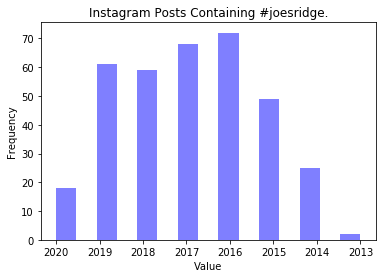

In [25]:
from matplotlib.pyplot import *
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

x = graph_data
num_bins = 15
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f"Instagram Posts Containing #{tag}.")
plt.show()

